### Analytical Solution of Model

In [2]:
from sympy import symbols, Matrix, simplify, solve, eye
import sympy as sp

# Define symbolic parameters
epsilon, t, U = symbols('epsilon t U', real=True)

# One-electron Hamiltonian in the basis {|up,0>, |0,up>}
H_1e = Matrix([[epsilon, -t],
               [-t, epsilon]])

# Solve eigenvalue problem for the one-electron Hamiltonian
eigvals_1e = H_1e.eigenvals()
eigvecs_1e = H_1e.eigenvects()

# Two-electron Hamiltonian in the basis {|updown,0>, |0,updown>, |up,up>, |down,down>, |up,down>, |down,up>}
H_2e = Matrix([
    [2*epsilon + U, 0, 0, 0, -t, -t],
    [0, 2*epsilon + U, 0, 0, t, t],
    [0, 0, 2*epsilon, 0, 0, 0],
    [0, 0, 0, 2*epsilon, 0, 0],
    [-t, t, 0, 0, 2*epsilon, 0],
    [-t, t, 0, 0, 0, 2*epsilon]
])

# Solve eigenvalue problem for the two-electron Hamiltonian
eigvals_2e = H_2e.eigenvals()
eigvecs_2e = H_2e.eigenvects()

# Simplify eigenvalues for clarity
eigvals_1e_simplified = {simplify(k): v for k, v in eigvals_1e.items()}
eigvals_2e_simplified = {simplify(k): v for k, v in eigvals_2e.items()}

eigvals_1e_simplified, eigvecs_1e, eigvals_2e_simplified, eigvecs_2e


({epsilon + t: 1, epsilon - t: 1},
 [(epsilon - t, 1, [Matrix([
    [1],
    [1]])]),
  (epsilon + t,
   1,
   [Matrix([
    [-1],
    [ 1]])])],
 {U + 2*epsilon: 1,
  2*epsilon: 3,
  U/2 + 2*epsilon - sqrt(U**2 + 16*t**2)/2: 1,
  U/2 + 2*epsilon + sqrt(U**2 + 16*t**2)/2: 1},
 [(2*epsilon,
   3,
   [Matrix([
    [0],
    [0],
    [1],
    [0],
    [0],
    [0]]),
    Matrix([
    [0],
    [0],
    [0],
    [1],
    [0],
    [0]]),
    Matrix([
    [ 0],
    [ 0],
    [ 0],
    [ 0],
    [-1],
    [ 1]])]),
  (U + 2*epsilon,
   1,
   [Matrix([
    [1],
    [1],
    [0],
    [0],
    [0],
    [0]])]),
  (U/2 + 2*epsilon - sqrt(U**2 + 16*t**2)/2,
   1,
   [Matrix([
    [ epsilon/t - (U/2 + 2*epsilon - sqrt(U**2 + 16*t**2)/2)/(2*t)],
    [-epsilon/t + (U/2 + 2*epsilon - sqrt(U**2 + 16*t**2)/2)/(2*t)],
    [                                                            0],
    [                                                            0],
    [                                                

### Numerical Solution

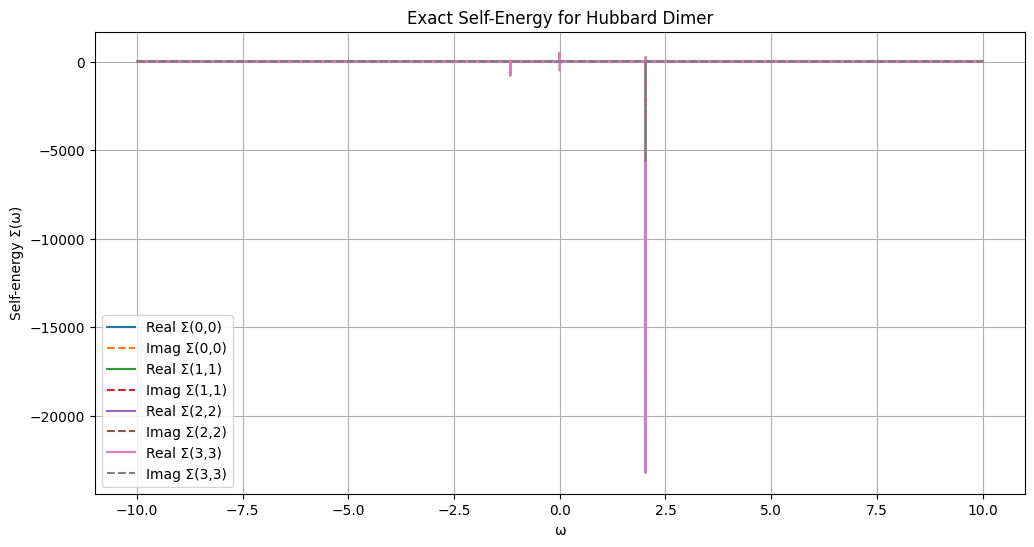

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
epsilon = 0.0
t = 1.0
U = 2.0
eta = 1e-5
omega = np.linspace(-10, 10, 5000)

# Useful definitions from the paper
c = np.sqrt(U**2 + 16*t**2)
X = (U/2)/(t + c/2)

# Non-interacting Green's function (U=0), eqs. (16,17) with U=0
def G0(omega):
    G0_matrix = np.zeros((4,4), dtype=complex)
    E_plus = epsilon + t
    E_minus = epsilon - t
    for i in range(2):
        G0_matrix[i,i] = 0.5/(omega - E_plus + 1j*eta) + 0.5/(omega - E_minus + 1j*eta)
    for i in range(2,4):
        G0_matrix[i,i] = 0.5/(omega - E_plus + 1j*eta) + 0.5/(omega - E_minus + 1j*eta)
    return G0_matrix

# Exact Green's function from paper eqs. (16,17)
def G(omega):
    G_matrix = np.zeros((4,4), dtype=complex)

    # Spin-up (simpler, eq. 16 from paper)
    E_plus = epsilon + t
    E_minus = epsilon - t
    for idx in [0, 2]:  # spin-up at sites 1,2
        G_matrix[idx,idx] = 0.5/(omega - E_plus + 1j*eta) + 0.5/(omega - E_minus + 1j*eta)

    # Spin-down (full eq. 17 from paper)
    alpha_sq = 1/(2 + X**2)
    gamma_sq = X**2/(2 + X**2)
    E_N1 = epsilon + t
    E_N2 = epsilon + U/2 - c/2

    for idx in [1, 3]:  # spin-down at sites 1,2
        term1 = alpha_sq / (omega - (epsilon + U + t) + 1j*eta)
        term2 = 0.5*gamma_sq / (omega - E_N2 + 1j*eta)
        term3 = 0.5/(omega - E_N1 + 1j*eta)
        G_matrix[idx,idx] = term1 + term2 + term3

    return G_matrix

# Compute self-energy matrix
def self_energy(omega):
    Sigma = np.linalg.inv(G0(omega)) - np.linalg.inv(G(omega))
    return Sigma

# Evaluate self-energy at each omega
Sigma_omega = np.array([self_energy(w) for w in omega])

# Example plot (diagonal elements)
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.plot(omega, Sigma_omega[:,i,i].real, label=f'Real Σ({i},{i})')
    plt.plot(omega, Sigma_omega[:,i,i].imag, '--', label=f'Imag Σ({i},{i})')

plt.xlabel('ω')
plt.ylabel('Self-energy Σ(ω)')
plt.legend()
plt.grid(True)
plt.title('Exact Self-Energy for Hubbard Dimer')
plt.show()


## Not sure where the error is!!


### Structure of the matrices

In [14]:
import numpy as np

# Parameters
epsilon = 0.0
t = 1.0
U = 2.0
eta = 0.01  # small imaginary part for numerical stability

# Frequency range
omega = 1.0 + 0.0j  # example frequency (complex)

# Intermediate parameters (from provided equations)
c = np.sqrt(16 * t**2 + U**2)
a = np.sqrt(2 * (16 * t**2 / (c - U)**2 + 1))
b = np.sqrt(2 * (16 * t**2 / (c + U)**2 + 1))

# Define functions for Green's functions
def G_up(i, j, omega):
    sign = (-1)**(i - j)
    return (sign / 2) * (
        1/(omega - (epsilon + t) + 1j*eta) + 
        sign/(omega - (epsilon - t) - 1j*eta)
    )

def G_down(i, j, omega):
    sign = (-1)**(i - j)
    term1 = 1/(omega - (epsilon + t) + 1j*eta)
    term2 = 1/(omega - (epsilon + t + U) + 1j*eta)
    term3 = (1/(a**2)) * (1 + 4*t/(c - U))**2 / (omega - (epsilon + t - (c - U)/2) + 1j*eta)
    term4 = (1/(b**2)) * (1 - 4*t/(c + U))**2 / (omega - (epsilon + t + (c + U)/2) + 1j*eta)
    
    return (sign / 4)*(term1 + term2) + (1/2)*(term3 + term4)

# Full G matrix (4x4: site1-up, site2-up, site1-down, site2-down)
G = np.zeros((4,4), dtype=complex)
sites = [1,2]

for i in sites:
    for j in sites:
        G[i-1,j-1] = G_up(i,j,omega)         # spin-up
        G[i+1,j+1] = G_down(i,j,omega)      # spin-down

# Non-interacting G0 matrix
def G0(i,j,omega):
    sign = (-1)**(i - j)
    return (sign/2)*(
        1/(omega - (epsilon + t) + 1j*eta) +
        sign/(omega - (epsilon - t) - 1j*eta)
    )

G_0 = np.zeros((4,4), dtype=complex)
for i in sites:
    for j in sites:
        G_0[i-1,j-1] = G0(i,j,omega)      # spin-up
        G_0[i+1,j+1] = G0(i,j,omega)      # spin-down identical to spin-up in non-interacting case

# Self-energy matrix Sigma = G0^-1 - G^-1
Sigma = np.linalg.inv(G_0) - np.linalg.inv(G)

# Print results
np.set_printoptions(precision=3, suppress=True)
print("Full interacting Green's function G(ω):")
print(G)
print("\nNon-interacting Green's function G0(ω):")
print(G_0)
print("\nSelf-energy Σ(ω):")
print(Sigma)



Full interacting Green's function G(ω):
[[0.25-49.999j 0.25+50.001j 0.   +0.j    0.   +0.j   ]
 [0.25+50.001j 0.25-49.999j 0.   +0.j    0.   +0.j   ]
 [0.   +0.j    0.   +0.j    0.25-25.004j 0.5 +24.998j]
 [0.   +0.j    0.   +0.j    0.5 +24.998j 0.25-25.004j]]

Non-interacting Green's function G0(ω):
[[0.25-49.999j 0.25+50.001j 0.   +0.j    0.   +0.j   ]
 [0.25+50.001j 0.25-49.999j 0.   +0.j    0.   +0.j   ]
 [0.   +0.j    0.   +0.j    0.25-49.999j 0.25+50.001j]
 [0.   +0.j    0.   +0.j    0.25+50.001j 0.25-49.999j]]

Self-energy Σ(ω):
[[0.   +0.j    0.   +0.j    0.   +0.j    0.   +0.j   ]
 [0.   +0.j    0.   +0.j    0.   +0.j    0.   +0.j   ]
 [0.   +0.j    0.   +0.j    0.333-0.016j 0.333-0.006j]
 [0.   +0.j    0.   +0.j    0.333-0.006j 0.333-0.016j]]


### Spectral Function: Non interacting system

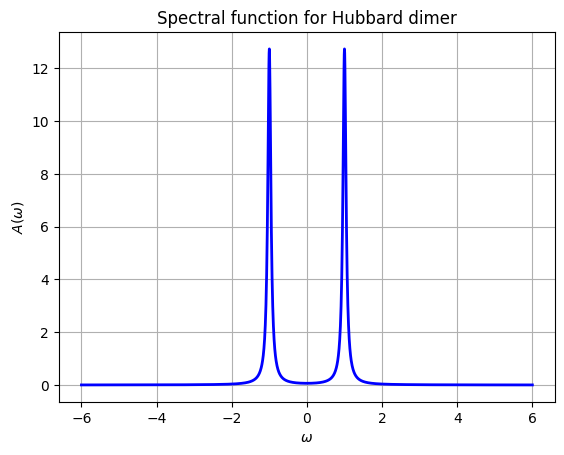

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
epsilon = 0.0
t = 1.0
U = 2.0
eta = 0.05  # small imaginary part for numerical stability

# Define frequency range
omega = np.linspace(-6, 6, 2000)

# Non-interacting Hamiltonian (H0)
H0 = np.array([[epsilon, -t, 0, 0],
               [-t, epsilon, 0, 0],
               [0, 0, epsilon, -t],
               [0, 0, -t, epsilon]])

# Example of previously computed self-energy matrix Sigma(ω)
# (user must provide actual Σ(ω) based on your previous calculations)
def Sigma(omega):
    Sigma_matrix = np.zeros((4,4),dtype=complex)
    # Compute the exact analytical self-energy here
    # Sigma_matrix[...] = ...
    return Sigma_matrix

# Compute interacting Green's function
def G(omega):
    Green = np.zeros((4,4,len(omega)),dtype=complex)
    for idx, w in enumerate(omega):
        Green[:,:,idx] = np.linalg.inv((w + 1j*eta)*np.eye(4) - H0 - Sigma(w))
    return Green

# Compute spectral function
G_w = G(omega)
A_w = -1/np.pi * np.imag(np.trace(G_w, axis1=0, axis2=1))

# Plot spectral function
plt.plot(omega, A_w, lw=2, color='blue')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$A(\omega)$')
plt.title('Spectral function for Hubbard dimer')
plt.grid()
plt.show()

### Spectral function Fully interacting

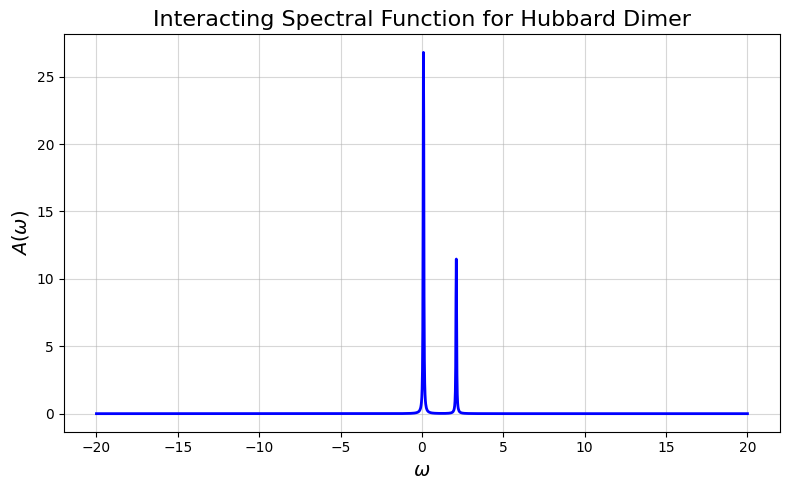

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
epsilon = 0.0
t = 0.1
U = 2.0
eta = 0.01  # Small imaginary part for numerical stability

# Frequency range
omega_real = np.linspace(-20, 20, 2000)

# Intermediate parameters (from previous expressions)
c = np.sqrt(16 * t**2 + U**2)
a = np.sqrt(2 * (16 * t**2 / (c - U)**2 + 1))
b = np.sqrt(2 * (16 * t**2 / (c + U)**2 + 1))

# Define interacting Green's functions from provided equations
def G_up(i, j, omega):
    sign = (-1)**(i - j)
    return (sign / 2) * (
        1/(omega - (epsilon + t) + 1j*eta) + 
        sign/(omega - (epsilon - t) - 1j*eta)
    )

def G_down(i, j, omega):
    sign = (-1)**(i - j)
    term1 = 1/(omega - (epsilon + t) + 1j*eta)
    term2 = 1/(omega - (epsilon + t + U) + 1j*eta)
    term3 = (1/(a**2)) * (1 + 4*t/(c - U))**2 / (omega - (epsilon + t - (c - U)/2) + 1j*eta)
    term4 = (1/(b**2)) * (1 - 4*t/(c + U))**2 / (omega - (epsilon + t + (c + U)/2) + 1j*eta)
    
    return (sign / 4)*(term1 + term2) + (1/2)*(term3 + term4)

# Compute full interacting Green's function matrix G(ω)
def compute_G_matrix(omega):
    G = np.zeros((4,4), dtype=complex)
    for i in [1,2]:
        for j in [1,2]:
            G[i-1,j-1] = G_up(i,j,omega)        # spin-up
            G[i+1,j+1] = G_down(i,j,omega)      # spin-down
    return G

# Compute spectral function A(ω)
A_omega = np.zeros(len(omega_real))
for idx, omega_val in enumerate(omega_real):
    omega = omega_val + 1j*eta
    G_matrix = compute_G_matrix(omega)
    A_omega[idx] = -(1/np.pi)*np.imag(np.trace(G_matrix))

# Plotting spectral function
plt.figure(figsize=(8,5))
plt.plot(omega_real, A_omega, color='blue', lw=2)
plt.xlabel(r'$\omega$', fontsize=14)
plt.ylabel(r'$A(\omega)$', fontsize=14)
plt.title('Interacting Spectral Function for Hubbard Dimer', fontsize=16)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


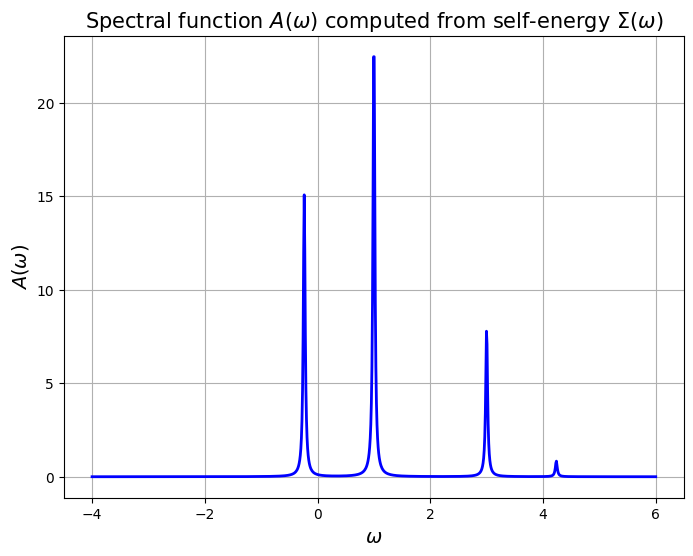

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
epsilon = 0.0
t = 1.0
U = 2.0
eta = 0.01  # Small imaginary part for numerical stability

# Frequency range for plotting
omega_real = np.linspace(-4, 6, 1000)

# Intermediate parameters
c = np.sqrt(16 * t**2 + U**2)
a = np.sqrt(2 * (16 * t**2 / (c - U)**2 + 1))
b = np.sqrt(2 * (16 * t**2 / (c + U)**2 + 1))

# Define Green's functions (from previous provided equations)
def G_up(i, j, omega):
    sign = (-1)**(i - j)
    return (sign / 2) * (
        1/(omega - (epsilon + t) + 1j*eta) + 
        sign/(omega - (epsilon - t) - 1j*eta)
    )

def G_down(i, j, omega):
    sign = (-1)**(i - j)
    term1 = 1/(omega - (epsilon + t) + 1j*eta)
    term2 = 1/(omega - (epsilon + t + U) + 1j*eta)
    term3 = (1/(a**2)) * (1 + 4*t/(c - U))**2 / (omega - (epsilon + t - (c - U)/2) + 1j*eta)
    term4 = (1/(b**2)) * (1 - 4*t/(c + U))**2 / (omega - (epsilon + t + (c + U)/2) + 1j*eta)
    
    return (sign / 4)*(term1 + term2) + (1/2)*(term3 + term4)

# Non-interacting G0 function
def G0(i, j, omega):
    sign = (-1)**(i - j)
    return (sign/2)*(
        1/(omega - (epsilon + t) + 1j*eta) +
        sign/(omega - (epsilon - t) - 1j*eta)
    )

# Preallocate arrays for spectral function
A_omega = np.zeros(len(omega_real))

# Loop over frequencies to compute A(ω) using Σ(ω)
for idx, omega_val in enumerate(omega_real):
    omega = omega_val + 1j*eta

    # Compute G matrix
    G = np.zeros((4,4), dtype=complex)
    for i in [1,2]:
        for j in [1,2]:
            G[i-1,j-1] = G_up(i,j,omega)          # Spin-up
            G[i+1,j+1] = G_down(i,j,omega)        # Spin-down

    # Compute G0 matrix
    G_0 = np.zeros((4,4), dtype=complex)
    for i in [1,2]:
        for j in [1,2]:
            G_0[i-1,j-1] = G0(i,j,omega)
            G_0[i+1,j+1] = G0(i,j,omega)

    # Self-energy matrix Σ(ω)
    Sigma = np.linalg.inv(G_0) - np.linalg.inv(G)

    # Interacting Green's function G(ω) from Σ explicitly:
    G_from_Sigma = np.linalg.inv(np.linalg.inv(G_0) - Sigma)

    # Spectral function from Σ directly:
    A_omega[idx] = -(1/np.pi)*np.imag(np.trace(G_from_Sigma))

# Plotting the Spectral function A(ω)
plt.figure(figsize=(8,6))
plt.plot(omega_real, A_omega, color='blue', linewidth=2)
plt.xlabel("$\omega$", fontsize=14)
plt.ylabel("$A(\omega)$", fontsize=14)
plt.title("Spectral function $A(\omega)$ computed from self-energy $\Sigma(\omega)$", fontsize=15)
plt.grid(True)
plt.show()
